<a href="https://colab.research.google.com/github/skazmiara007/COVID-19_prediction_on-ML_CSE499/blob/main/Applying_Smote_in_all_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#necessary libraries
import pandas as pd
import numpy as np

In [ ]:
#reading the dataset into a dataframe and showing first 5 rows
dataframe = pd.read_csv("/content/drive/MyDrive/data/corona_tested_individuals_ver_0083.english.csv", low_memory=False)
dataframe.head(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [ ]:
#shape of the dataset
dataframe.shape

(2742596, 10)

In [ ]:
#null values in the dataset
dataframe.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [ ]:
#drop the null values
dataframe.dropna(inplace=True)

In [ ]:
#null values in the dataset after dropping null values
dataframe.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [ ]:
#shape of the dataset after dropping null values
dataframe.shape

(2186227, 10)

In [ ]:
#dropping the date and age column
dataframe.drop('test_date', inplace=True, axis=1)
dataframe.drop('age_60_and_above', inplace=True, axis=1)
dataframe.head(5)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,0,0,0,0,0,negative,male,Other
1,0,1,0,0,0,negative,male,Other
2,0,0,0,0,0,negative,female,Other
3,0,0,0,0,0,negative,male,Other
4,0,1,0,0,0,negative,male,Contact with confirmed


In [ ]:
#number of unique values in each column
dataframe.nunique()

cough                  2
fever                  2
sore_throat            2
shortness_of_breath    2
head_ache              2
corona_result          3
gender                 2
test_indication        3
dtype: int64

In [ ]:
#unique values in each column
for col in dataframe:
    print(col, ': ', dataframe[col].unique())

cough :  [0 1]
fever :  [0 1]
sore_throat :  [0 1]
shortness_of_breath :  [0 1]
head_ache :  [0 1]
corona_result :  ['negative' 'positive' 'other']
gender :  ['male' 'female']
test_indication :  ['Other' 'Contact with confirmed' 'Abroad']


In [ ]:
#dropping the rows with other corona results
dataframe = dataframe[dataframe.corona_result != 'other']
dataframe['corona_result'].value_counts()

negative    1943172
positive     208726
Name: corona_result, dtype: int64

In [ ]:
#checking the final shape of the dataset
dataframe.shape

(2151898, 8)

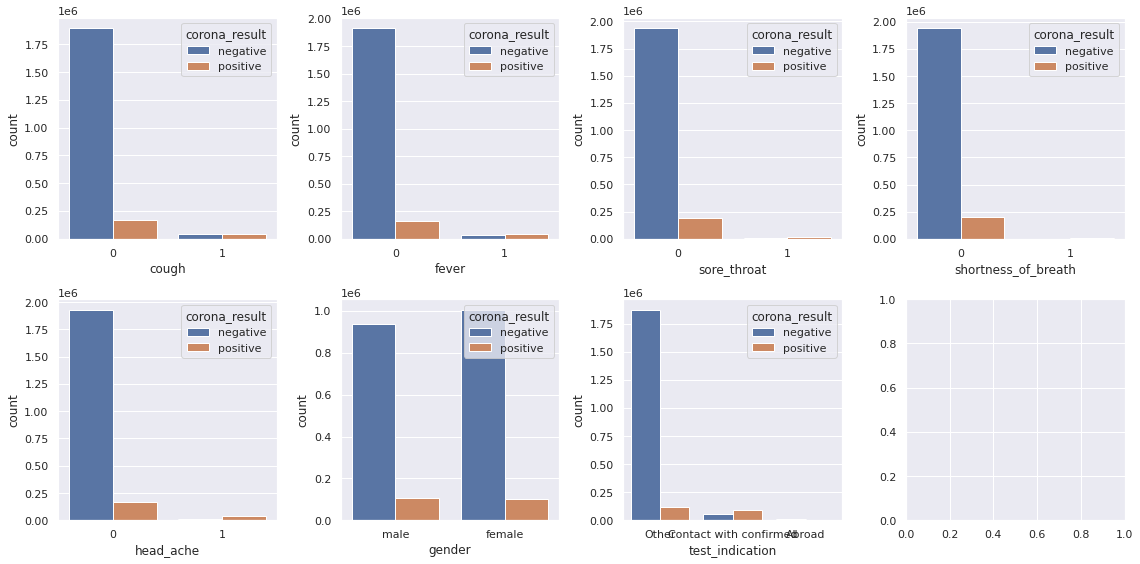

In [ ]:
#corona_result in term of cough feature
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
fig, ax = plt.subplots(2,4)
sns.countplot(x="cough", hue="corona_result", data=dataframe, ax=ax[0,0])
sns.countplot(x="fever", hue="corona_result", data=dataframe, ax=ax[0,1])
sns.countplot(x="sore_throat", hue="corona_result", data=dataframe, ax=ax[0,2])
sns.countplot(x="shortness_of_breath", hue="corona_result", data=dataframe, ax=ax[0,3])
sns.countplot(x="head_ache", hue="corona_result", data=dataframe, ax=ax[1,0])
#sns.countplot(x="age_60_and_above", hue="corona_result", data=dataframe, ax=ax[1,1])
sns.countplot(x="gender", hue="corona_result", data=dataframe, ax=ax[1,1])
sns.countplot(x="test_indication", hue="corona_result", data=dataframe, ax=ax[1,2])
plt.tight_layout()

In [ ]:
#convreting the cetegorical values into numerical values
pd.options.mode.chained_assignment = None
dataframe['corona_result'].replace(['negative', 'positive'], [0, 1], inplace=True)
#dataframe['age_60_and_above'].replace(['No', 'Yes'], [0, 1], inplace=True)
dataframe['gender'].replace(['male', 'female'], [1, 0], inplace=True)
dataframe['test_indication'].replace(['Other', 'Contact with confirmed', 'Abroad'], [0, 1, 2], inplace=True)

dataframe.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,1


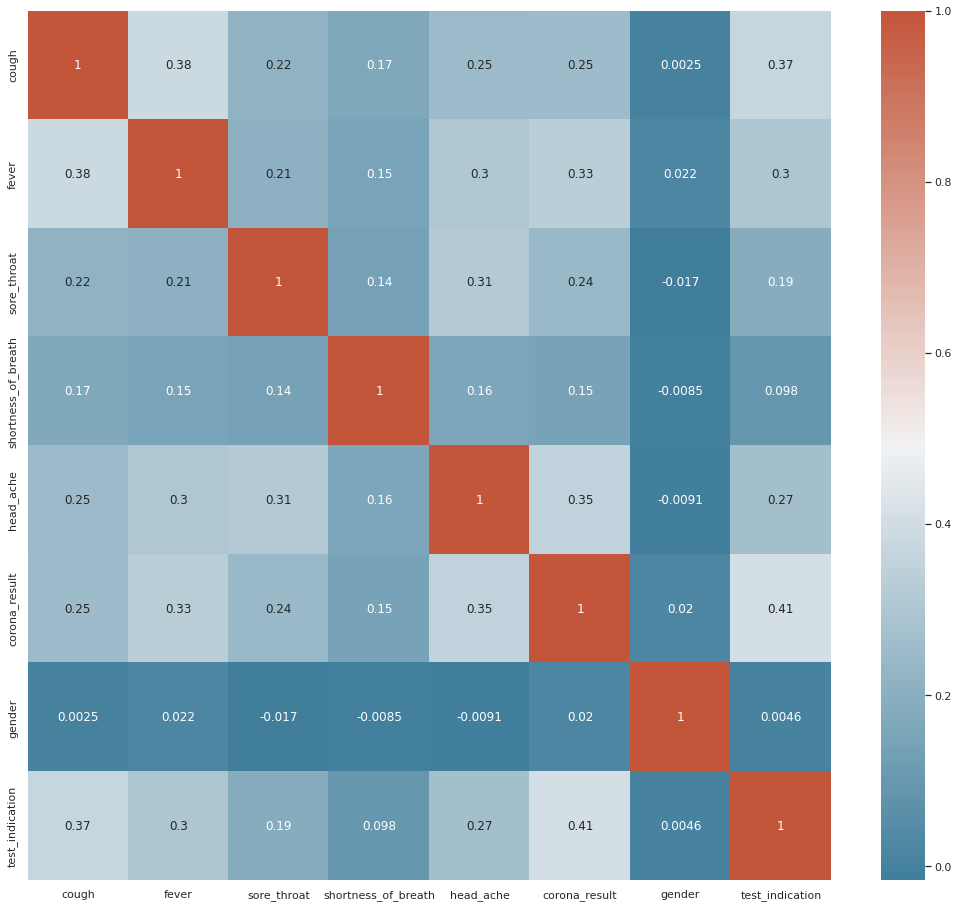

In [ ]:
#ploting a heatmap showing the coorelation
plt.figure(figsize=(18, 16))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dataframe.corr(), cmap=cmap, annot=True)

# Model Training

### Spliting data into test and train set

In [ ]:
#features
X = dataframe.drop('corona_result',axis=1)

#target variable
y = dataframe['corona_result']

In [ ]:
#count of positive and negative case in the dataset
from collections import Counter

print('Dataset shape %s' % Counter(y))

Dataset shape Counter({0: 1943172, 1: 208726})


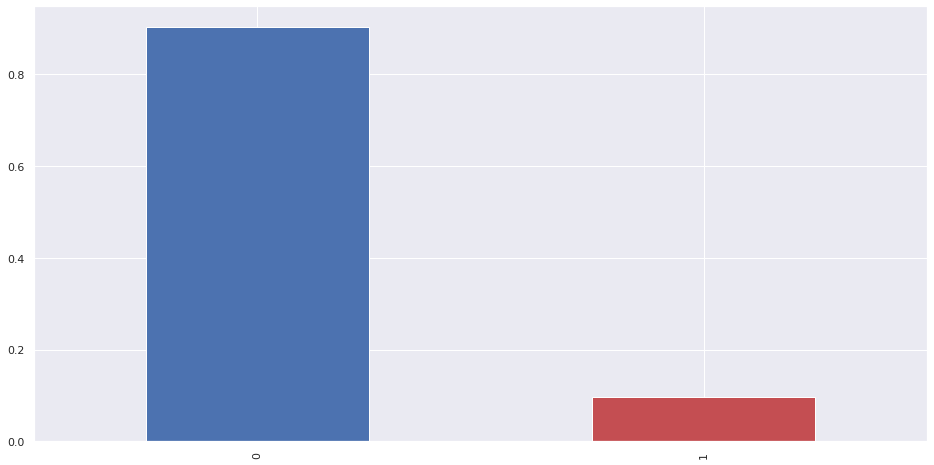

In [ ]:
#plot it for a better visualization
class_distribution = pd.Series(y).value_counts(normalize=True)
my_colors = ['b', 'r', 'g', 'y', 'k']
ax = class_distribution.plot.bar(color=my_colors)

In [ ]:
#undersampling data to balance it
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 260907, 1: 208726})


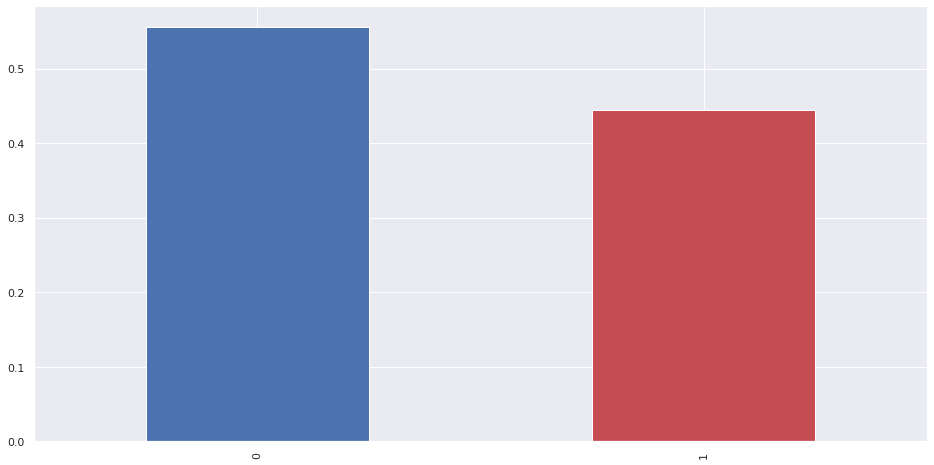

In [ ]:
#plot it for a better visualization
class_distribution = pd.Series(y_res).value_counts(normalize=True)
my_colors = ['b', 'r', 'g', 'y', 'k']
ax = class_distribution.plot.bar(color=my_colors)

In [ ]:
#splitting the data into 75% train data and 25% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
#number of training data
X_train.shape

(1613923, 7)

In [ ]:
#number of test data
X_test.shape

(537975, 7)

In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=0) 
X_smote, y_smote = sm.fit_resample(X_train, y_train) 
 
np.bincount(y_smote)

array([1457216, 1457216])

**Ensemble**

**Ada Boost**

In [ ]:
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
adaBoostModel = AdaBoostClassifier(n_estimators=250, learning_rate=1)
ada = adaBoostModel.fit(X_smote, y_smote)

y_predict = ada.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

Accuracy:  0.9265319020400576
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    485956
           1       0.62      0.63      0.62     52019

    accuracy                           0.93    537975
   macro avg       0.79      0.79      0.79    537975
weighted avg       0.93      0.93      0.93    537975



**XgBoost**

In [ ]:
from xgboost.training import train
import xgboost as xgb
xgbtrain = xgb.DMatrix(X_smote, label=y_smote)
xgbtest = xgb.DMatrix(X_test, label=y_test)

param = {'max depth': 4, 'eta': 0.25, 'objective': 'multi:softmax', 'num_class': 10}
epochs = 15

xgbModel = xgb.train(param, xgbtrain, epochs)
xgbPredict = xgbModel.predict(xgbtest)

print("Accuracy: ", metrics.accuracy_score(y_test, xgbPredict))
print(classification_report(y_test, xgbPredict))

Accuracy:  0.9218067754077792
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    485956
           1       0.59      0.65      0.62     52019

    accuracy                           0.92    537975
   macro avg       0.77      0.80      0.79    537975
weighted avg       0.93      0.92      0.92    537975



### Linear Regression Model

In [ ]:
#necessary library
from sklearn.linear_model import LinearRegression

In [ ]:
#training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#prediction on test data
predictions = model.predict(X_test)

In [ ]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
628549,0,0.056933
184491,0,0.056933
36036,0,0.056933
1633189,0,0.056933
1528526,0,0.045882
...,...,...
1141316,0,0.045882
371092,0,0.056933
101296,0,0.056933
66571,0,0.045882


In [ ]:
#model's accurary score
model.score(X_test, y_test)

0.26810268162590123

In [ ]:
#save the model
import pickle

filename = 'LinearRegression_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Apply smote in Logistic Regression Model

In [ ]:
#necessary library
from sklearn.linear_model import LogisticRegression

In [ ]:
#training the model
log_model = LogisticRegression()
log_model.fit(X_smote, y_smote)

LogisticRegression()

In [ ]:
#prediction on test data
predictions = log_model.predict(X_test)

In [ ]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
628549,0,0
184491,0,0
36036,0,0
1633189,0,0
1528526,0,0
...,...,...
1141316,0,0
371092,0,0
101296,0,0
66571,0,0


In [ ]:
#model's accurary score
log_model.score(X_test, y_test)

0.9202026116455225

In [ ]:
#save the model
import pickle

filename = 'LogisticRegression_model.sav'
pickle.dump(log_model, open(filename, 'wb'))

#### Evaluating logistic regression model

In [ ]:
#necessary library
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

In [ ]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.96      0.95      0.96    485956
    Positive       0.58      0.64      0.61     52019

    accuracy                           0.92    537975
   macro avg       0.77      0.80      0.78    537975
weighted avg       0.92      0.92      0.92    537975



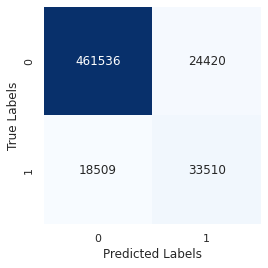

In [ ]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()


In [ ]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07979738835447744

In [ ]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07979738835447744

In [ ]:
#r2 Score
r2_score(y_test, predictions)

0.08640457008113467

### Apply Smote in Decision Tree Model

In [ ]:
#finding optimum depth for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depth = []
for i in range(1, 10):
    d_tree = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=i)
    d_tree.fit(X_smote, y_smote)
    y_predict = d_tree.predict(X_test)
    depth.append(accuracy_score(y_test, y_predict))
    print('Depth= ', i, ": ", accuracy_score(y_test, y_predict))

Depth=  1 :  0.9151466146196384
Depth=  2 :  0.9182768716018402
Depth=  3 :  0.9272178075189368
Depth=  4 :  0.9211078581718481
Depth=  5 :  0.9215985872949487
Depth=  6 :  0.9218030577629072
Depth=  7 :  0.9218049165853431
Depth=  8 :  0.9218049165853431
Depth=  9 :  0.9218049165853431


No handles with labels found to put in legend.


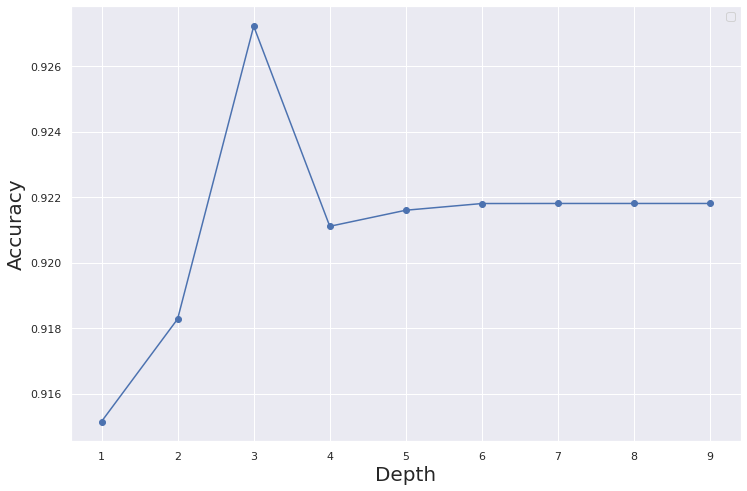

In [ ]:

#ploting the accuracies for different tree depth
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), depth, marker='o')
plt.xlabel('Depth', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(range(1, 10))
legend_prop = {'weight':'bold'}
plt.legend(prop=legend_prop)
plt.show()

In [ ]:
#making model with depth=7 for prediction
d_tree = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=7)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=100)

In [ ]:
#prediction on test data
predictions = d_tree.predict(X_test)

In [ ]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
628549,0,0
184491,0,0
36036,0,0
1633189,0,0
1528526,0,0
...,...,...
1141316,0,0
371092,0,0
101296,0,0
66571,0,0


In [ ]:
#model's accurary score
d_tree.score(X_test, y_test)

0.929716064872903

In [ ]:
#save the model
import pickle

filename = 'DecisionTree_model.sav'
pickle.dump(d_tree, open(filename, 'wb'))

#### Evaluating Decision Tree model

In [ ]:
#classification report for Decision Tree
print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.96      0.97      0.96    485956
    Positive       0.65      0.59      0.62     52019

    accuracy                           0.93    537975
   macro avg       0.80      0.78      0.79    537975
weighted avg       0.93      0.93      0.93    537975



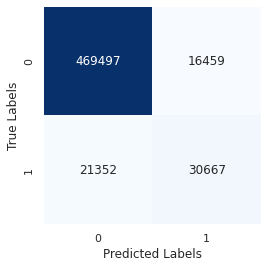

In [ ]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [ ]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07028393512709698

In [ ]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07028393512709698

In [ ]:
#r2 Score
r2_score(y_test, predictions)

0.19532351555679806

### Apply Smote in Random Forest Model

In [ ]:
#creating model and making predicton
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier(random_state=0)
r_forest.fit(X_smote, y_smote)

RandomForestClassifier(random_state=0)

In [ ]:
#prediction on test data
predictions = r_forest.predict(X_test)


In [ ]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
628549,0,0
184491,0,0
36036,0,0
1633189,0,0
1528526,0,0
...,...,...
1141316,0,0
371092,0,0
101296,0,0
66571,0,0


In [ ]:
#model's accurary score
r_forest.score(X_test, y_test)

0.9218067754077792

In [ ]:
#save the model

filename = 'RandomForest_model.sav'
pickle.dump(r_forest, open(filename, 'wb'))

#### Evaluating Random Forest model

In [ ]:
#Classification Report

print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.96      0.95      0.96    485956
    Positive       0.59      0.65      0.62     52019

    accuracy                           0.92    537975
   macro avg       0.77      0.80      0.79    537975
weighted avg       0.93      0.92      0.92    537975



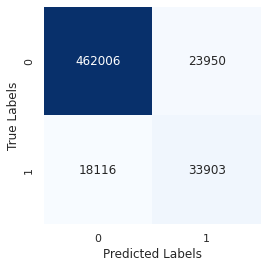

In [ ]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [ ]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07819322459222083

In [ ]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07819322459222083

In [ ]:
#r2 Score
r2_score(y_test, predictions)

0.10477054310682787

### Apply Smote in KNN Model

Creating a smaller subset of test data for KNN

In [ ]:
d_X_test = X_test.head(10000)
#d_X_test.value_counts()

In [ ]:
d_y_test = y_test.head(10000)
d_y_test.value_counts()

0    9062
1     938
Name: corona_result, dtype: int64

Training the model

In [ ]:
#necessary library
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#making model with k=25 for prediction
KNN = KNeighborsClassifier(n_neighbors=25, n_jobs=-1)
KNN.fit(X_smote, y_smote)

KNeighborsClassifier(n_jobs=-1, n_neighbors=25)

In [ ]:
#prediction on test data
predictions = KNN.predict(X_test)

In [ ]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

In [ ]:
#model's accurary score
KNN.score(X_test, y_test)

In [ ]:
#save the model

filename = 'KNN_model.sav'
pickle.dump(KNN, open(filename, 'wb'))

#### Evaluating KNN model

In [ ]:
#Classification Report

print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

In [ ]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [ ]:
#mean squared error
mean_squared_error(y_test, predictions)

In [ ]:
#mean absolute error
mean_absolute_error(y_test, predictions)

In [ ]:
#r2 Score
r2_score(y_test, predictions)

# Training ANN Model

### Creating the model

In [ ]:
#necessary library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [ ]:
X_smote.shape

(352224, 7)

In [ ]:
model = Sequential()

# input layer
model.add(Dense(60,  activation='relu'))
#model.add(Dropout(0.2))

# hidden layer
model.add(Dense(30, activation='relu'))
#model.add(Dropout(0.2))

# hidden layer
model.add(Dense(15, activation='relu'))
#model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
#training the model
model.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
11007/11007 [==============================] - 40s 3ms/step - loss: 0.4557 - val_loss: 0.4543
Epoch 2/25
11007/11007 [==============================] - 40s 4ms/step - loss: 0.4522 - val_loss: 0.4539
Epoch 3/25
11007/11007 [==============================] - 39s 4ms/step - loss: 0.4519 - val_loss: 0.4536
Epoch 4/25
11007/11007 [==============================] - 36s 3ms/step - loss: 0.4519 - val_loss: 0.4530
Epoch 5/25
11007/11007 [==============================] - 37s 3ms/step - loss: 0.4517 - val_loss: 0.4534
Epoch 6/25
11007/11007 [==============================] - 39s 4ms/step - loss: 0.4517 - val_loss: 0.4533
Epoch 7/25
11007/11007 [==============================] - 36s 3ms/step - loss: 0.4516 - val_loss: 0.4537
Epoch 8/25
11007/11007 [==============================] - 37s 3ms/step - loss: 0.4515 - val_loss: 0.4530
Epoch 9/25
11007/11007 [==============================] - 36s 3ms/step - loss: 0.4515 - val_loss: 0.4532
Epoch 10/25
11007/11007 [==============================

### Saving the model

In [ ]:
#necessary library
from tensorflow.keras.models import load_model

model.save('ANN_model.h5')  

### Evaluating the ANN Model

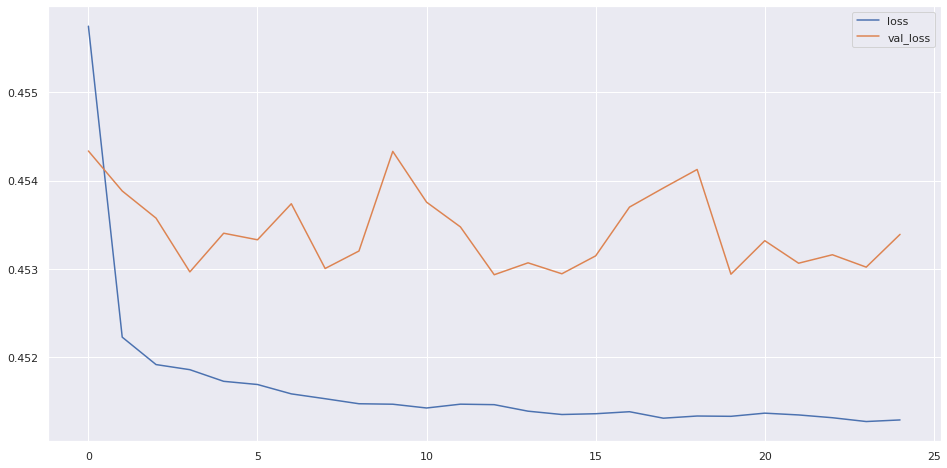

In [ ]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

In [ ]:
#predicting using ANN model
predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [ ]:
#mean squared error
mean_squared_error(y_test, predictions)

In [ ]:
#mean absolute error
mean_absolute_error(y_test, predictions)

In [ ]:
#r2 Score
r2_score(y_test, predictions)